In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'../../data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'../../data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,value='value',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                time_budget= 60,  metric= 'r2');

In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: extra_tree
Best model parameters: {'n_estimators': 67, 'max_features': 0.3709604506494188, 'max_leaves': 2194}


In [11]:
automl.best_result

{'pred_time': 1.5024909414506856e-05,
 'wall_clock_time': 59.443004846572876,
 'metric_for_logging': {'pred_time': 1.5024909414506856e-05},
 'val_loss': 0.13269603410822775,
 'training_iteration': 1,
 'config': {'n_estimators': 67,
  'max_features': 0.3709604506494188,
  'max_leaves': 2194},
 'config/n_estimators': 67,
 'config/max_features': 0.3709604506494188,
 'config/max_leaves': 2194,
 'experiment_tag': 'exp',
 'time_total_s': 0.41884422302246094}

In [12]:
automl.feature_importances_

array([0.06563929, 0.12539712, 0.06182271, 0.08106384, 0.06327864,
       0.16310861, 0.07884819, 0.02661096, 0.04277407, 0.01731889,
       0.03747036, 0.10539541, 0.09336044, 0.03791146])

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype=object)

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.906466,1.558195e-01,1.944151,1.693701e-02,0.211322,2.752912,0.941635,0.0,0.645910,0.822955,0.886676,testing
0,4780,0.980544,1.218923e-16,0.382363,1.337661e-17,0.041961,0.484369,0.998295,0.0,0.930158,0.965079,0.996593,training
0,6373,0.962027,3.894875e-02,0.772749,4.264039e-03,0.084599,1.438855,0.984557,0.0,0.858969,0.929485,0.969352,all


In [16]:
df1a

,rowid,date,ssrd,tp,d2m,rh2m,blh,v10,t2m,tcc,sp,u10,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,-1.164153e-10,0.000008,277.183465,91.884130,384.209053,1.545010,278.394725,0.650958,102252.303312,-2.720528,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,-1.164153e-10,0.000002,276.695430,92.715877,353.220263,1.282742,277.772899,0.603699,102211.168636,-2.308789,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,-1.164153e-10,0.000005,276.505662,93.485560,255.911846,0.758730,277.463419,0.710378,102174.855967,-2.216471,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,-1.164153e-10,0.000005,276.412816,93.906363,191.375560,0.509013,277.305813,0.837765,102166.786485,-1.928623,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,-1.164153e-10,0.000003,276.553051,93.696878,151.780210,0.607069,277.478941,0.819103,102142.578039,-1.700043,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,-5.820766e-11,0.000000,272.197565,90.582979,476.945688,-1.945195,273.557442,0.918149,99902.506413,1.380939,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,-5.820766e-11,0.000000,272.171041,89.939908,486.665851,-2.102732,273.629146,0.839639,99947.625909,0.987925,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,-5.820766e-11,0.000000,272.087408,90.422188,489.355002,-1.933668,273.470592,0.739354,100000.215520,0.681543,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,-5.820766e-11,0.000000,272.235319,95.088677,40.714872,-0.583816,272.926062,0.643753,100042.844978,1.020793,17.1,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=ad.normalise(automl, df1a,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-14 14:12:09 : Sampling and predicting 300 times...
Execution time: 19.52 seconds


In [18]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,13.956067
2020-01-01 01:00:00,43.2,14.260900
2020-01-01 02:00:00,43.0,13.197339
2020-01-01 03:00:00,42.8,13.163009
2020-01-01 04:00:00,36.8,12.622191
...,...,...
2020-12-31 19:00:00,11.7,9.579838
2020-12-31 20:00:00,11.0,9.425947
2020-12-31 21:00:00,15.3,9.305683


In [19]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300)

2024-06-14 14:13:29 : Sampling and predicting 300 times...


In [20]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,14.101311
2020-01-01 01:00:00,43.2,14.091293
2020-01-01 02:00:00,43.0,13.406496
2020-01-01 03:00:00,42.8,13.642593
2020-01-01 04:00:00,36.8,13.462635
...,...,...
2020-12-31 19:00:00,11.7,9.320012
2020-12-31 20:00:00,11.0,9.536456
2020-12-31 21:00:00,15.3,9.336147


In [21]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.906466,1.558195e-01,1.944151,1.693701e-02,0.211322,2.752912,0.941635,0.0,0.645910,0.822955,0.886676,testing
0,4780,0.980544,9.141920e-17,0.382363,1.003246e-17,0.041961,0.484369,0.998295,0.0,0.930158,0.965079,0.996593,training
0,6373,0.962027,3.894875e-02,0.772749,4.264039e-03,0.084599,1.438855,0.984557,0.0,0.858969,0.929485,0.969352,all


In [22]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300,n_models=10)

2024-06-14 14:14:40 : Sampling and predicting 300 times...
2024-06-14 14:15:46 : Sampling and predicting 300 times...
2024-06-14 14:16:59 : Sampling and predicting 300 times...
2024-06-14 14:18:46 : Sampling and predicting 300 times...
2024-06-14 14:19:54 : Sampling and predicting 300 times...
2024-06-14 14:21:23 : Sampling and predicting 300 times...
2024-06-14 14:22:29 : Sampling and predicting 300 times...
2024-06-14 14:24:45 : Sampling and predicting 300 times...
2024-06-14 14:26:26 : Sampling and predicting 300 times...
2024-06-14 14:27:40 : Sampling and predicting 300 times...


In [23]:
df_dew

,Observed,Normalised_979812,Normalised_378829,Normalised_120727,Normalised_541475,Normalised_488292,Normalised_813334,Normalised_90992,Normalised_206312,Normalised_81536,Normalised_774600,mean,std,median,lower_bound,upper_bound,weighted
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.683573,30.458170,12.684649,14.164893,14.847600,14.625942,14.173692,20.263724,14.997868,19.350832,17.625094,5.332162,14.922734,13.017704,28.258886,17.247904
2020-01-01 01:00:00,43.2,19.990526,25.941523,13.089798,13.573306,14.905622,13.103605,13.449135,17.029330,14.170310,19.712326,16.496548,4.228646,14.537966,13.092905,24.602548,16.143954
2020-01-01 02:00:00,43.0,19.777561,26.792866,12.962208,13.076367,14.382815,12.625865,13.438076,17.422204,13.925427,19.736019,16.413941,4.566376,14.154121,12.701542,25.214422,16.110077
2020-01-01 03:00:00,42.8,19.176115,27.780739,13.782295,13.687832,12.855450,13.628104,12.916830,16.714287,13.354595,20.114981,16.401123,4.795719,13.735064,12.869261,26.055943,16.168382
2020-01-01 04:00:00,36.8,19.746719,26.903036,12.800286,14.643508,14.125848,13.496162,13.617503,17.359149,13.307068,19.646646,16.564593,4.467908,14.384678,12.914312,25.292865,16.210714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.889203,12.807426,9.837965,12.485026,9.919489,10.515366,10.108376,13.817638,10.404770,13.751149,11.653641,1.639058,11.500196,9.856308,13.802678,11.164091
2020-12-31 20:00:00,11.0,12.714019,12.763096,9.516796,12.878751,10.488226,10.179301,10.071891,14.771630,10.045538,13.367285,11.679653,1.816399,11.601122,9.635763,14.455652,11.147478
2020-12-31 21:00:00,15.3,13.056449,12.505454,9.772520,12.939261,10.024578,10.051037,9.695131,13.863711,9.600322,13.506016,11.501448,1.802561,11.278245,9.621654,13.783230,11.008818


# Time series decomposition

In [24]:
df_dewc, mod_stats=ad.ts_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random',time_budget=60,
                  n_samples=100,fraction=0.75)

2024-06-14 14:28:42 : Sampling and predicting 100 times...
2024-06-14 14:28:45 : Sampling and predicting 100 times...
2024-06-14 14:28:47 : Sampling and predicting 100 times...
2024-06-14 14:28:50 : Sampling and predicting 100 times...
2024-06-14 14:28:53 : Sampling and predicting 100 times...


In [25]:
df_dewc

,Observed,all,date_unix,day_julian,weekday,hour,Deweathered
date,,,,,,,
2020-01-01 00:00:00,58.1,9.401583,10.092664,3.684689,1.332014,0.150172,15.686046
2020-01-01 01:00:00,43.2,8.650961,10.541410,3.984180,1.610011,-0.380653,15.430834
2020-01-01 02:00:00,43.0,9.072173,10.235016,3.337722,1.490733,-0.530939,14.629630
2020-01-01 03:00:00,42.8,9.070259,10.301018,3.790287,1.566343,-0.353156,15.399675
2020-01-01 04:00:00,36.8,8.936169,10.280599,3.381185,1.307752,-0.326326,14.604304
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.763782,8.065007,0.497075,-0.134845,0.077693,9.293637
2020-12-31 20:00:00,11.0,8.982044,8.600860,0.581836,-0.137478,-0.086900,8.965287
2020-12-31 21:00:00,15.3,8.053655,8.959578,1.066865,-0.034124,-0.049648,9.021250


In [26]:
df_dewc, mod_stats=ad.met_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-14 14:29:56 : Sampling and predicting 100 times...
2024-06-14 14:30:00 : Sampling and predicting 100 times...
2024-06-14 14:30:04 : Sampling and predicting 100 times...
2024-06-14 14:30:08 : Sampling and predicting 100 times...
2024-06-14 14:30:12 : Sampling and predicting 100 times...
2024-06-14 14:30:16 : Sampling and predicting 100 times...
2024-06-14 14:30:20 : Sampling and predicting 100 times...
2024-06-14 14:30:24 : Sampling and predicting 100 times...
2024-06-14 14:30:28 : Sampling and predicting 100 times...
2024-06-14 14:30:32 : Sampling and predicting 100 times...
2024-06-14 14:30:36 : Sampling and predicting 100 times...


In [27]:
df_dewc

,Observed,all,blh,u10,d2m,sp,t2m,v10,tcc,rh2m,ssrd,tp
date,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,9.413547,-0.109699,2.397438,-0.876934,0.314705,-0.321382,0.722685,0.790640,0.833516,0.208813,0.833275
2020-01-01 01:00:00,43.2,8.702681,0.219060,2.507585,-0.522800,0.321397,0.067075,0.749778,0.973694,0.447875,-0.141540,0.203513
2020-01-01 02:00:00,43.0,9.111698,1.596030,2.857449,-1.353869,-0.258409,-0.123303,0.780806,1.227408,0.670241,-0.232315,-0.122472
2020-01-01 03:00:00,42.8,9.112720,2.700313,2.609056,-0.963482,-0.618812,0.015911,0.381989,0.450630,0.408785,-0.450684,1.023970
2020-01-01 04:00:00,36.8,8.937752,2.920135,2.823497,-0.624855,-0.027387,-0.042476,0.582667,0.927296,0.433751,-0.333320,0.381732
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.781804,-0.466922,-0.619834,-0.301745,0.088922,0.248183,-0.312718,0.194384,0.136834,-0.299003,0.021125
2020-12-31 20:00:00,11.0,9.073642,-0.261038,-0.027479,-0.486904,0.142321,0.101305,-0.208449,-0.135489,-0.020221,-0.182753,0.026105
2020-12-31 21:00:00,15.3,8.075559,0.384263,0.471665,-0.156137,-0.072196,0.133978,-0.230957,-0.183906,-0.067292,-0.339629,-0.004571


# Rolling weather normalisation

In [28]:
df_dewc1, mod_stats=ad.rolling_dew(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-06-14 14:31:41 : Sampling and predicting 100 times...
2024-06-14 14:31:42 : Sampling and predicting 100 times...
2024-06-14 14:31:42 : Sampling and predicting 100 times...
2024-06-14 14:31:43 : Sampling and predicting 100 times...
2024-06-14 14:31:43 : Sampling and predicting 100 times...
2024-06-14 14:31:43 : Sampling and predicting 100 times...
2024-06-14 14:31:44 : Sampling and predicting 100 times...
2024-06-14 14:31:44 : Sampling and predicting 100 times...
2024-06-14 14:31:45 : Sampling and predicting 100 times...
2024-06-14 14:31:45 : Sampling and predicting 100 times...
2024-06-14 14:31:45 : Sampling and predicting 100 times...
2024-06-14 14:31:46 : Sampling and predicting 100 times...
2024-06-14 14:31:46 : Sampling and predicting 100 times...
2024-06-14 14:31:47 : Sampling and predicting 100 times...
2024-06-14 14:31:47 : Sampling and predicting 100 times...
2024-06-14 14:31:47 : Sampling and predicting 100 times...
2024-06-14 14:31:48 : Sampling and predicting 100 times.

In [29]:
df_dewc1.head()

,Observed,Rolling_0,Rolling_1,Rolling_2,Rolling_3,Rolling_4,Rolling_5,Rolling_6,Rolling_7,Rolling_8,...,Rolling_29,Rolling_30,Rolling_31,Rolling_32,Rolling_33,Rolling_34,Rolling_35,Rolling_36,Rolling_37,Rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,17.029417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,18.292791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,17.315693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.808010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.257004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

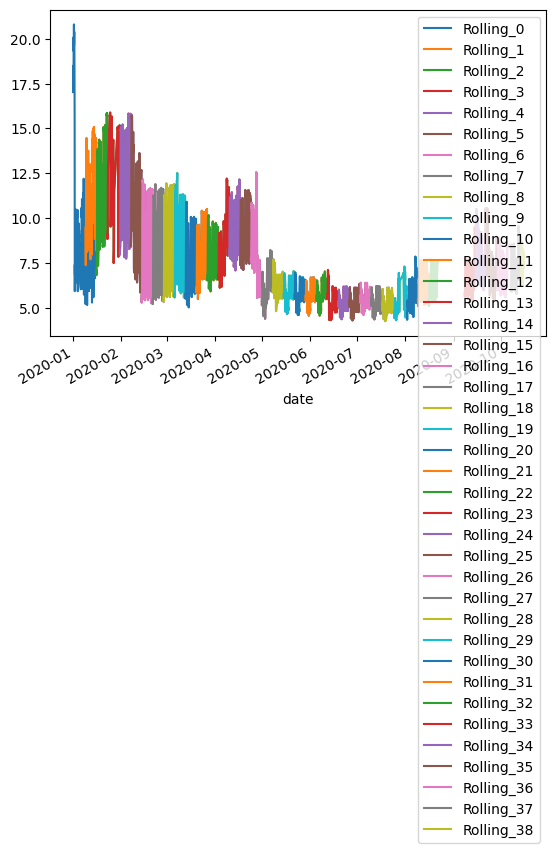

In [33]:
df_dewc1.iloc[:,1:].plot()

In [30]:
df_dewc2, mod_stats=ad.met_rolling(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-14 14:32:59 : Sampling and predicting 100 times...
2024-06-14 14:33:00 : Sampling and predicting 100 times...
2024-06-14 14:33:00 : Sampling and predicting 100 times...
2024-06-14 14:33:01 : Sampling and predicting 100 times...
2024-06-14 14:33:01 : Sampling and predicting 100 times...
2024-06-14 14:33:01 : Sampling and predicting 100 times...
2024-06-14 14:33:02 : Sampling and predicting 100 times...
2024-06-14 14:33:02 : Sampling and predicting 100 times...
2024-06-14 14:33:03 : Sampling and predicting 100 times...
2024-06-14 14:33:03 : Sampling and predicting 100 times...
2024-06-14 14:33:03 : Sampling and predicting 100 times...
2024-06-14 14:33:04 : Sampling and predicting 100 times...
2024-06-14 14:33:04 : Sampling and predicting 100 times...
2024-06-14 14:33:05 : Sampling and predicting 100 times...
2024-06-14 14:33:05 : Sampling and predicting 100 times...
2024-06-14 14:33:05 : Sampling and predicting 100 times...
2024-06-14 14:33:06 : Sampling and predicting 100 times.

In [31]:
df_dewc2.head()

,Observed,Normalised,EMI_mean_14,EMI_std_14,MET_short,MET_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.289709,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.582930,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,22.667221,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,23.204002,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.390478,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

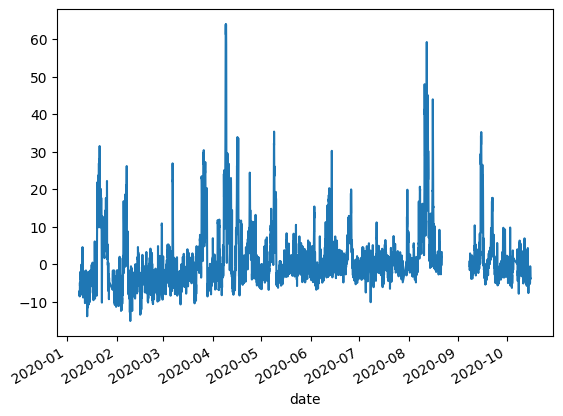

In [32]:
df_dewc2['MET_short'].plot()

<Axes: xlabel='date'>

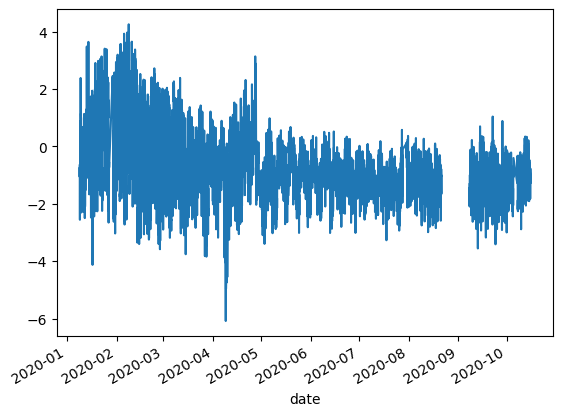

In [34]:
df_dewc2['MET_season'].plot()